In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import shutil

In [136]:
# load csv
df_municipis = pd.read_csv('data/poblacio_municipis.csv')

In [137]:
def get_dades_poblacio(any):
    decimal_places = 1
    df_municipis['Latitud_round'] = df_municipis.Latitud.apply(lambda x: round(float(x), decimal_places))
    df_municipis['Longitud_round'] = df_municipis.Longitud.apply(lambda x: round(float(x), decimal_places))
    column_string = 'Poblacio_' + str(any)
    df_municipis['Poblacio'] = df_municipis[column_string].apply(lambda x: float(str(x).replace('.', '')))

    latitud_poblacio = df_municipis.groupby('Latitud_round')['Poblacio'].sum()
    max_latitud_poblacio = np.max(latitud_poblacio.values)
    latitud_poblacio_percentatge = latitud_poblacio.apply(lambda x: x / max_latitud_poblacio * 100)
    longitud_poblacio = df_municipis.groupby('Longitud_round')['Poblacio'].sum()
    max_longitud_poblacio = np.max(longitud_poblacio.values)
    longitud_poblacio_percentatge = longitud_poblacio.apply(lambda x: x / max_longitud_poblacio * 100)
    return latitud_poblacio.index.values, latitud_poblacio_percentatge.values, longitud_poblacio.index.values, longitud_poblacio_percentatge.values

In [138]:
# load img
img = plt.imread('img/map_catalonia.png')

In [139]:
def plot_any(any, temp_dir_name):
    valors_latitud, poblacio_latitud, valors_longitud, poblacio_longitud = get_dades_poblacio(any)
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2, hspace=0.08, wspace=-0.35)
    (ax1, ax2), (ax3, ax4) = gs.subplots()
    fig.suptitle('Distribució de la població a Catalunya')
    ax1.bar(valors_longitud, poblacio_longitud, width=0.1)
    ax2.text(0.4, 0.5, any, size=30)
    # plot image
    ax3.imshow(img, extent=[0, 3.5, 40.3, 43])
    ax4.barh(valors_latitud, poblacio_latitud, height=0.1)
    ax1.set_aspect(0.03)
    ax1.axis('off')
    ax2.axis('off')
    ax3.set_aspect(1.2)
    ax3.axis('off')
    ax4.set_aspect(30)
    ax4.axis('off')
    filename = temp_dir_name + '/' + str(any)
    plt.savefig(filename)
    plt.show()

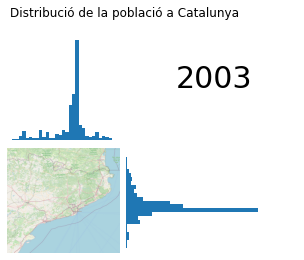

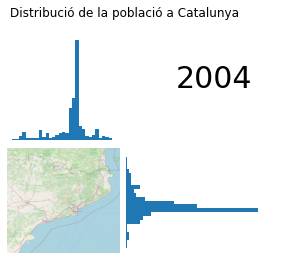

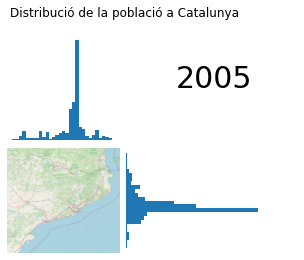

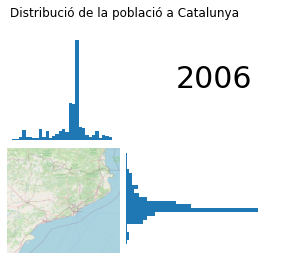

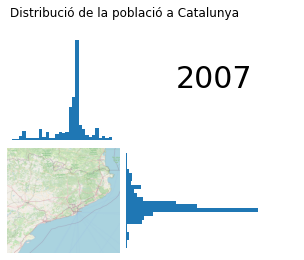

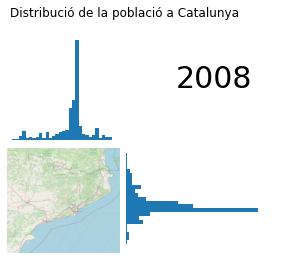

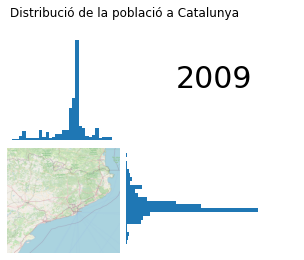

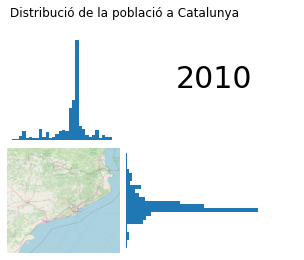

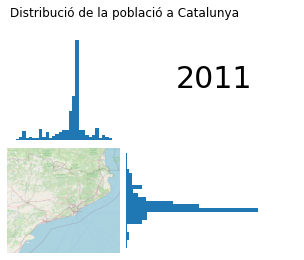

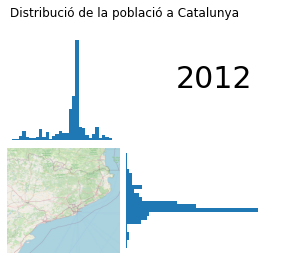

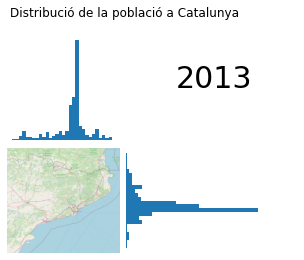

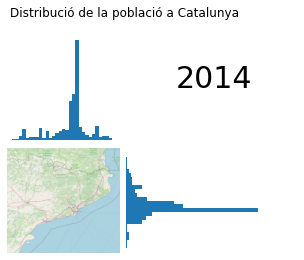

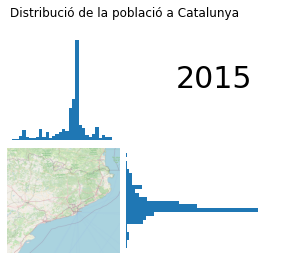

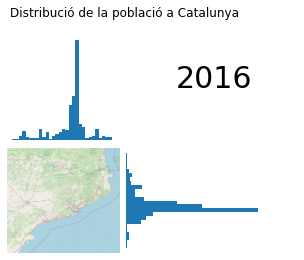

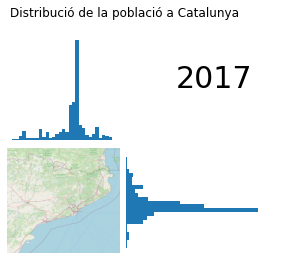

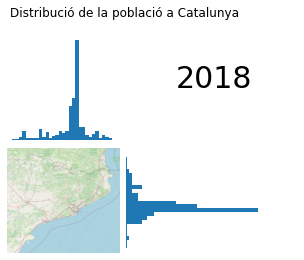

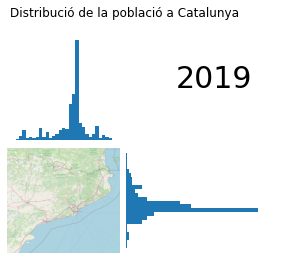

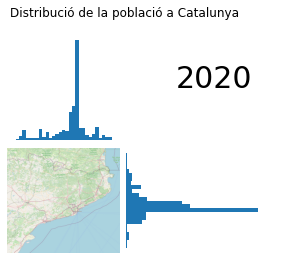

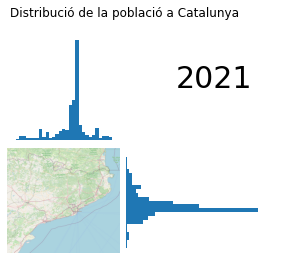

/tmp/ipykernel_35990/1677528813.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filepath)


In [142]:
# generate charts and save as a tmp files
temp_dir_name = 'tmp_map'
os.mkdir(temp_dir_name)
for any in range(2003, 2022):
    plot_any(any, temp_dir_name)
    
# building GIF
frames = []
for filename in sorted([f for f in os.listdir(temp_dir_name)]):
    filepath = temp_dir_name + '/' + filename
    image = imageio.imread(filepath)
    frames.append(image)
# Save them as frames into a gif 
exportname = 'result/cat-population-map.gif'
kargs = { 'duration': 1 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)
shutil.rmtree(temp_dir_name, ignore_errors=True)